In [1]:
%cd /home/isaiah/code/NestedGraphs/

/home/isaiah/code/NestedGraphs


In [2]:
import glob
import torch 
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE

In [3]:
b_embs = glob.glob('inputs/Sept23/benign/tgat_embgraph*')
m_embs = glob.glob('inputs/Sept23/mal/tgat_embgraph*')

bs = []
for b in b_embs:
    bs.append(torch.load(b))

ms = []
for m in m_embs:
    ms.append(torch.load(m))

b_x = torch.cat([b for b in bs])
m_x = torch.cat([m for m in ms])

print(b_x.size())
print(m_x.size())


torch.Size([77352, 128])
torch.Size([49125, 128])


In [4]:
from utils.graph_utils import propagate_labels

colors = []
for m in m_embs:
    with open(m.replace('tgat_emb','full_'), 'rb') as f:
        g = pickle.load(f)

    procs = (g.x[:,0] == 1).nonzero().squeeze(-1)
    y = propagate_labels(g,23)
    colors.append(y[procs])

colors = torch.cat(colors).clamp(0,1)

In [6]:
def plots_dots(b_x, m_x, title, colors):
    pca = PCA(n_components=3)
    bx = pca.fit_transform(m_x)
    x = pca.transform(m_x)

    #plt.scatter(bx[:,0], bx[:,1], color='blue')
    plt.scatter(x[colors==0,0], x[colors==0,1], color='blue')
    plt.scatter(x[colors==1,0], x[colors==1,1], color='red')
    plt.title(title)
    plt.show()

    plt.scatter(x[colors==0,0], x[colors==0,2], color='blue')
    plt.scatter(x[colors==1,0], x[colors==1,2], color='red')
    plt.title(title)
    plt.show()

In [8]:
plots_dots(b_x.cpu(), m_x.cpu(), 'Self CL 4 epochs', colors)

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [7]:
from graph_utils import propagate_labels
from tqdm import tqdm 

b_embs = glob.glob('inputs/Sept23/benign/tgat_embgraph*')
m_embs = glob.glob('inputs/Sept23/mal/tgat_embgraph*')

bs = []
for b in tqdm(b_embs):
    with open(b.replace('tgat_embgraph','full_graph'), 'rb') as f:
        g = pickle.load(f)

    mask = torch.tensor(g.ntypes) == 0
    bs.append(torch.load(b)[mask])

ms = []
colors = []
for m in tqdm(m_embs):
    with open(m.replace('tgat_embgraph','full_graph'), 'rb') as f:
        g = pickle.load(f)
    
    proc_mask = torch.tensor(g.ntypes)==0

    ms.append(torch.load(m)[proc_mask])
    colors.append(propagate_labels(g,23)[proc_mask])

b_x = torch.cat([b for b in bs])
m_x = torch.cat([m for m in ms])

print(b_x.size())
print(m_x.size())
colors = torch.cat(colors).clamp(0,1)

100%|██████████| 17/17 [01:39<00:00,  5.88s/it]

torch.Size([90833, 64])
torch.Size([59265, 64])


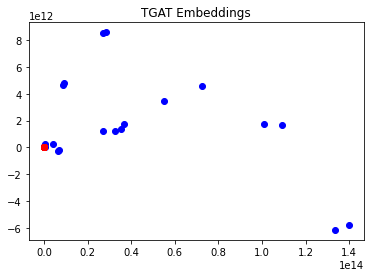

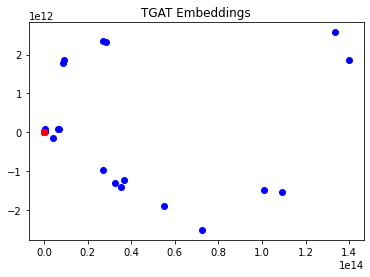

In [13]:
plots_dots(b_x, m_x, 'TGAT Embeddings', colors)